In [1]:
import pandas as pd

train_dataset = pd.read_csv('/content/drive/MyDrive/Datavidia/train_dataset_advanced_large.csv', index_col=0)
Y_training_df = train_dataset["main-label"]
# Drop 'label' column
X_training_df = train_dataset.drop(labels = ['main-label','main-id'],axis = 1) 
print('Y_train shape', Y_training_df.shape)
print('X_train shape', X_training_df.shape) 

Y_train shape (18570,)
X_train shape (18570, 15408)


In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding

X_training = X_training_df.values
Y_training = to_categorical(Y_training_df.values, num_classes = 2)

# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_training, Y_training, test_size = 0.1)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

x_train shape (16713, 15408)
x_val shape (1857, 15408)
y_train shape (16713, 2)
y_val shape (1857, 2)


In [3]:
# from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow_addons.metrics import F1Score
model = Sequential()

# Model 1
# model.add(Dense(1, activation = "relu",input_shape=(15408,)))
# model.add(Dropout(0.3))
# model.add(Dense(2, activation = "softmax"))

# Model 2
# model.add(Dropout(0.1, input_shape=(15408,)))
model.add(Dense(2, activation='softmax',input_shape=(15408,)))
# Define the optimizer
optimizer = Adam(lr=0.001)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=[F1Score(2,average='macro')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 30818     
Total params: 30,818
Trainable params: 30,818
Non-trainable params: 0
_________________________________________________________________


In [4]:
epochs = 50  # for better result increase the epochs
batch_size = 100
reduce_lr =  ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_delta=1e-4, mode='min',verbose=1)
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Datavidia/model NN-categorical (best val_acc).h5",
                             verbose=1, save_best_only=True, monitor='val_f1_score',mode='max')
# Fit the model
history = model.fit(X_train, Y_train, 
                    epochs = epochs, 
                    validation_data = (X_val,Y_val), 
                    batch_size=batch_size,
                    callbacks=[checkpoint])

Epoch 1/50
168/168 [==============================] - 4s 11ms/step - loss: 0.5122 - f1_score: 0.5079 - val_loss: 0.3385 - val_f1_score: 0.6559

Epoch 00001: val_f1_score improved from -inf to 0.65589, saving model to /content/drive/MyDrive/Datavidia/model NN-categorical (best val_acc).h5
Epoch 2/50
168/168 [==============================] - 1s 9ms/step - loss: 0.3099 - f1_score: 0.7381 - val_loss: 0.2686 - val_f1_score: 0.8114

Epoch 00002: val_f1_score improved from 0.65589 to 0.81143, saving model to /content/drive/MyDrive/Datavidia/model NN-categorical (best val_acc).h5
Epoch 3/50
168/168 [==============================] - 1s 9ms/step - loss: 0.2491 - f1_score: 0.8278 - val_loss: 0.2305 - val_f1_score: 0.8494

Epoch 00003: val_f1_score improved from 0.81143 to 0.84938, saving model to /content/drive/MyDrive/Datavidia/model NN-categorical (best val_acc).h5
Epoch 4/50
168/168 [==============================] - 1s 9ms/step - loss: 0.2062 - f1_score: 0.8745 - val_loss: 0.2066 - val_f1_s

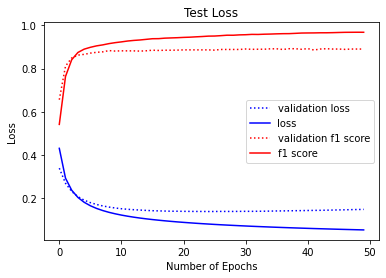

In [5]:
import matplotlib.pyplot as plt

# Plot the loss and f1 score curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss", linestyle=':')
plt.plot(history.history['loss'], color='b', label="loss", linestyle='-')
plt.plot(history.history['val_f1_score'], color='r', label="validation f1 score", linestyle=':')
plt.plot(history.history['f1_score'], color='r', label="f1 score", linestyle='-')
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Test Section

In [6]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Datavidia/model NN-categorical (best val_acc).h5')

In [7]:
import pandas as pd

test_dataset = pd.read_csv('/content/drive/MyDrive/Datavidia/test_dataset_advanced.csv', index_col=0)
# Drop 'label' column
X_test = test_dataset.drop(labels = ['main-id'],axis = 1)
print('X_test shape', X_test.shape) 

X_test shape (3714, 15408)


In [8]:
# from copy import deepcopy
# import numpy as np

# def binary_classifier(label):
#   temp = deepcopy(label)
#   for i in temp:
#     if i[0] > 0.5:
#       i[0] = 1
#     else:
#       i[0] = 0
#   return temp

In [9]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test.values)
# Y_pred_advanced = binary_classifier(Y_pred).astype(int)
Y_pred_advanced = np.argmax(Y_pred,axis = 1)
Y_pred_advanced = Y_pred_advanced.reshape(-1)
print(Y_pred_advanced)

[0 0 0 ... 0 0 1]


In [10]:
temp1 = test_dataset['main-id'].values
test_result = list(zip(list(temp1),list(Y_pred_advanced)))
test_result_df = pd.DataFrame(test_result,columns=['review_id','category'])
test_result_df

,review_id,category
0,7302180ac7160f04a405d8aa7bd6beb8,0
1,3184c670e170f565c7522eb76a320ba1,0
2,e33abf6bb5d5a9a77c339043b1725dc8,0
3,061d388950340070a6ac03fabc9027b0,0
4,e62d87c348674b6c06856964f3ab16b8,1
...,...,...
3709,4fac4c272d9194021f921138ebd5b389,0
3710,4fabd4722dd4074841f9656f75105f09,0
3711,44ff89997547d54cccb2a33776181240,0
3712,c46cf84e3665a10199a539fee919edd6,0


In [11]:
#2 - 0.90682
#3 - 0.92297
test_result_df.to_csv('/content/drive/MyDrive/Datavidia/test_result-NN-categorical-3.csv', index=False)
